In [328]:
import numpy as np
import pandas as pd

### データの読み込み

In [275]:
# !ls data/raw

In [276]:
train = pd.read_csv('./data/raw/train.csv')
test = pd.read_csv('./data/raw/test.csv')
gender_submission = pd.read_csv('./data/raw/gender_submission.csv')

In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [279]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [280]:
print(test.info(),train.info(),gender_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float6

trainデータ（訓練データ）とテストデータをまとめて特徴量エンジニアリングするために、先に結合する。（最後にまた分割する）

In [281]:
data = pd.concat([train,test],sort=False)

In [282]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


欠損値の有無確認

In [284]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 特徴量エンジニアリング

１．Pclassは、乗船チケットの階級。優先救出の可能性があるので、特徴量に利用する。
- 欠損値はなし
- そのまま利用

In [285]:
# Pclass
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

２．Sexは、男女。体力差などが考えられるため、特徴量に利用する。
- 欠損値はなし
- ただし、文字列のため、0と１の数値に変換しておく

In [286]:
# SEX
data['Sex'].replace(['male','female'],[0,1],inplace=True)

In [287]:
data['Sex'].isnull().sum()

0

３．Embarkedは、出港地（どこでTitanicに乗ったか）の情報
- 欠損値がある
- 一番割合が多いSで埋めておく
- C - Cherbourg, S - Southampton, Q = Queenstown
- Sexと同じく、0,1,2に置換する

In [288]:
# Embarked
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [289]:
data['Embarked'].fillna('S',inplace=True)

In [290]:
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [291]:
data['Embarked'].isnull().sum()

0

４．Fareは、運賃
- 欠損値がある
- 平均値で埋める

In [292]:
# Fare
data['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [293]:
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [294]:
data['Fare'].isnull().sum()

0

５．Ageは、年齢
子供のほうが助かりやすい気がするので、特徴量に利用する
- 欠損値が多い
- 標準偏差を考慮した乱数で埋める（パターン１）。この場合の乱数は、実行ごとに値が違う。したがって再現性が低い。    `np.random.randint(age_avg - age_std,age_avg + age_std)`部分
- 欠損していないデータの中央値で埋める（パターン２）

In [295]:
# # Age 欠損値処理のパターン１　乱数による欠損値処理
# age_avg = data['Age'].mean()
# age_std = data['Age'].std()
# data['Age'].fillna(np.random.randint(age_avg - age_std,age_avg + age_std),inplace=True)

In [296]:
# Age　欠損値処理のパターン２　中央値による欠損値処理
data['Age'].fillna(data['Age'].median(),inplace=True)

In [297]:
data['Age'].isnull().sum()

0

６．ParchとSibSpは、両親・子供と、兄弟・配偶者の数  
乗船した家族の人数が多いなら、生存率が低いかもしれないという仮説から実装

In [298]:
# FalilySizeを作成（本人含めての家族構成数）
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]

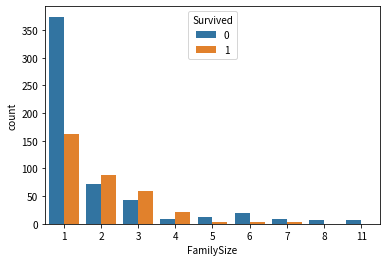

In [299]:
import seaborn as sns

sns.countplot(x='FamilySize',data=train,hue='Survived')


７．単身乗船が非常に多いが、生存率も低いので単独か否かも特徴量に入れる

In [300]:
data['IsAlone'] = 0
data.loc[data['FamilySize']==1,'IsAlone'] = 1


In [301]:
train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

#### 使わないcolumnを削除


In [302]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

dataを、train,testに戻しておく

In [303]:
# 前処理を行ったdataから、元のtrainとtestに分割する
train = data[:len(train)]
test = data[len(train):]

trainを特徴量部分と予測の対象に分割しておく

In [304]:
y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
X_test = test.drop('Survived',axis=1)

In [305]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,0
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,3,0,35.0,8.0500,0,1,1


### 機械学習アルゴリズムを利用

In [306]:
from sklearn.linear_model import LogisticRegression

In [307]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)


- FalimySizeアリ、IsAloneアリ

In [308]:
clf.fit(X_train,y_train)

/Users/me/Dev/.venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
y_pred_familysize_isalone = clf.predict(X_test)
sub['Survived'] = list(map(int,y_pred_familysize_isalone))
sub.to_csv('submission_familysize_isalone.csv',index=False)
sub.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [310]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


- FamilySizeナシ、IsAloneアリ

In [311]:
clf.fit(X_train.drop('FamilySize', axis=1),y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize',axis=1))
sub['Survived'] = list(map(int,y_pred_isalone))
sub.to_csv('submission_isalone.csv',index=False)
sub.head()


/Users/me/Dev/.venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


- FamilySizeアリ、IsAloneナシ

In [312]:
clf.fit(X_train.drop('IsAlone', axis=1),y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone',axis=1))
sub['Survived'] = list(map(int,y_pred_familysize))
sub.to_csv('submission_familysize.csv',index=False)
sub.head()

/Users/me/Dev/.venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### アルゴリズム変更

- ランダムフォレスト

In [314]:
train = pd.read_csv('./data/raw/train.csv')
test = pd.read_csv('./data/raw/test.csv')
gender_submission = pd.read_csv('./data/raw/gender_submission.csv')
data = pd.concat([train,test],sort=False)
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].fillna('S',inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
data['IsAlone'] = 0
data.loc[data['FamilySize']==1,'IsAlone'] = 1
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)
train = data[:len(train)]
test = data[len(train):]
y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
X_test = test.drop('Survived',axis=1)

In [320]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred_randomforest = clf.predict(X_test)
sub = pd.DataFrame(pd.read_csv('./data/raw/test.csv')['PassengerId'])
sub['Survived'] = list(map(int,y_pred_randomforest))
sub.to_csv('./data/submmit/submission_randomforest.csv',index=False)

### LightGBM

- ここは、Google Colabにて実施
- LightGBM_titanicを参照

### クロスバリデーション（Cross Validation）
- 特徴量エンジニアリング
- 機械学習アルゴリズムの選定
- ハイパーパラメータの調整（Google Colab参照）  
の後は、
- 機械学習モデルの性能を見積もる「Validation」  

例えば、Titanicのような二値分類の問題で、０のラベルがついたデータのみがPublicLBに使われていた場合、０のラベルでは高い予測精度であっても、このモデルが１のラベルを予測するときにどれくらいの性能を発揮するかは未知数。ここで、モデルの汎化性能を検証するためにCrossValidationを用いる